In [155]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns


In [156]:
data = pd.read_csv("master.csv")

In [157]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [158]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [160]:
data.shape

(27820, 12)

In [161]:
#data = data.drop(columns=["HDI for year"])
data = data.drop(columns=["country-year"])

In [162]:
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [163]:
data["age"].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [164]:
data_age = data.iloc[:, 3]
data_age

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
            ...     
27815    35-54 years
27816      75+ years
27817     5-14 years
27818     5-14 years
27819    55-74 years
Name: age, Length: 27820, dtype: object

In [165]:
# for i in range(3):
#   print(random.randrange(15, 24))

In [166]:
# for i in data_age[data_age == "15-24 years"]:
#   for j in range(1):
#     m = random.randrange(15, 24)
#     i = m
# data_age


In [167]:
# for i in data_age[data_age == "15-24 years"]:

#     m = random.randrange(15, 24)
    
    

In [168]:
data['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [169]:
import random
data["age"] = data["age"].replace({"15-24 years":"20", "35-54 years":"40", "75+ years":"75", "25-34 years":"30","55-74 years":"64","5-14 years":"10"})
data["age"] = data["age"].astype(int)
data["age"].value_counts()

20    4642
40    4642
75    4642
30    4642
64    4642
10    4610
Name: age, dtype: int64

In [170]:
data['suicides_no'] = data['suicides_no'].astype(int)


In [171]:
data["suicides/100k pop"].value_counts()

0.00     4281
0.29       72
0.32       69
0.34       55
0.37       52
         ... 
46.73       1
41.47       1
61.03       1
28.25       1
26.61       1
Name: suicides/100k pop, Length: 5298, dtype: int64

In [172]:
def extract_country(var):

  country = var.Country_year[len(var.Country_year):len(var.Country_year)-4: -1]
  var.Country_year = country

  return var

In [173]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,20,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,40,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,20,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,30,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,40,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,10,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,10,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [174]:
data["country"].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [175]:
data["sex"].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [176]:
data["year"].value_counts()

2009    1068
2010    1056
2001    1056
2002    1032
2000    1032
2011    1032
2007    1032
2003    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [177]:
data[" gdp_for_year ($) "]

0         2,156,624,900
1         2,156,624,900
2         2,156,624,900
3         2,156,624,900
4         2,156,624,900
              ...      
27815    63,067,077,179
27816    63,067,077,179
27817    63,067,077,179
27818    63,067,077,179
27819    63,067,077,179
Name:  gdp_for_year ($) , Length: 27820, dtype: object

In [178]:
vat = "2,156,624,900"
vat = vat.replace(",", " ")
vat

'2 156 624 900'

In [179]:
def resolve(data):

  data[" gdp_for_year ($) "] = data[" gdp_for_year ($) "].replace(",", "")
  return data

In [180]:
data = data.apply(resolve, axis="columns")

In [181]:
data[" gdp_for_year ($) "] = data[" gdp_for_year ($) "].astype(int)

In [182]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,20,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,40,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,20,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,30,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,40,107,3620833,2.96,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75,9,348465,2.58,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,10,60,2762158,2.17,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,10,44,2631600,1.67,0.675,63067077179,2309,Generation Z


In [183]:
data["suicides/100k pop"].nunique()

5298

In [184]:
data["generation"].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [185]:
data["population"].dtype

dtype('int64')

In [186]:
data["gdp_per_capita ($)"].unique()

array([ 796,  769,  833, ..., 1964, 2150, 2309])

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  int64  
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  int64  
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 2.3+ MB


In [188]:
for col in data.columns:
  print(col)

country
year
sex
age
suicides_no
population
suicides/100k pop
HDI for year
 gdp_for_year ($) 
gdp_per_capita ($)
generation


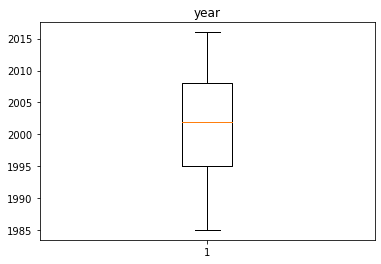

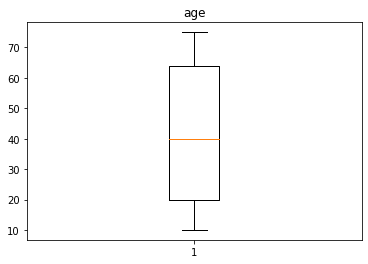

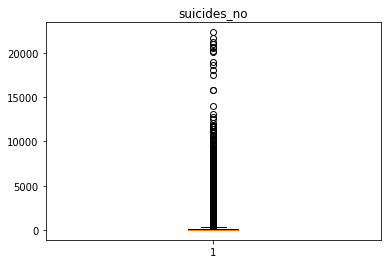

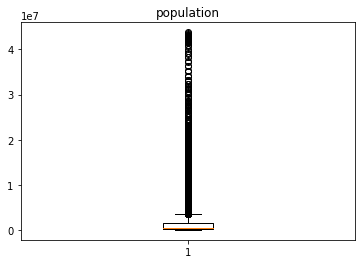

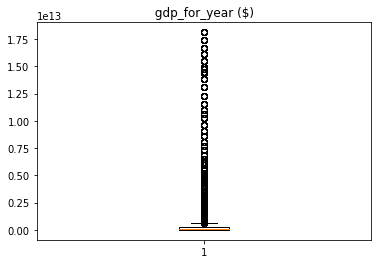

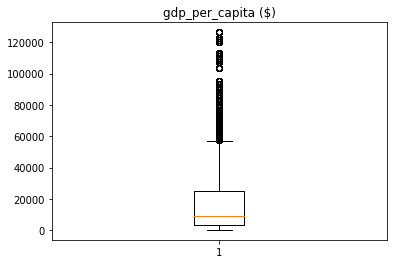

In [189]:
from IPython.core.pylabtools import figsize
for col in data.columns:
  if data[col].dtype == "int64" :
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

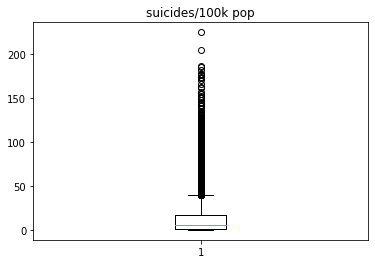

In [190]:

plt.boxplot(data["suicides/100k pop"])
plt.title("suicides/100k pop")
plt.show()

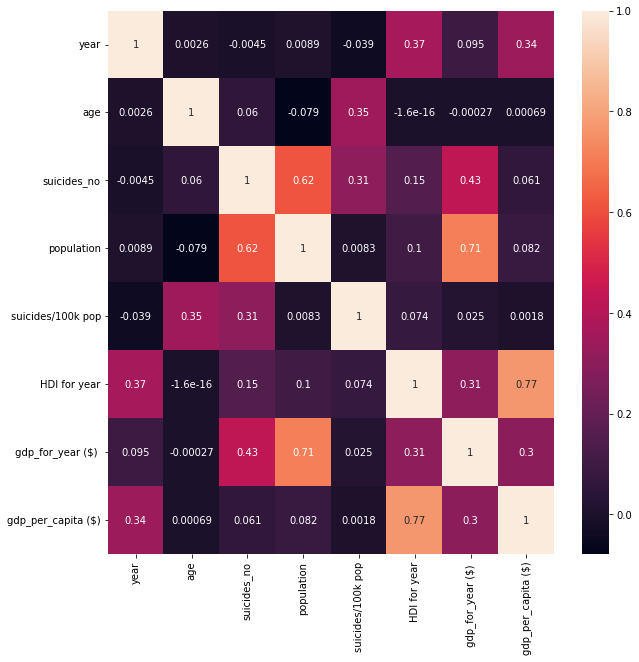

In [191]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [192]:
data.iloc[::, 7]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
27815    0.675
27816    0.675
27817    0.675
27818    0.675
27819    0.675
Name: HDI for year, Length: 27820, dtype: float64

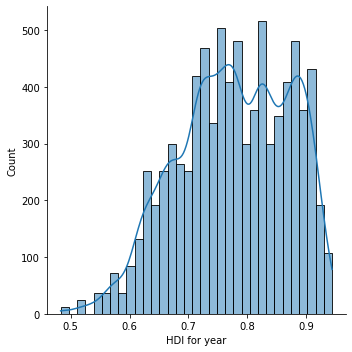

In [193]:
sns.displot(data.iloc[::, 7], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


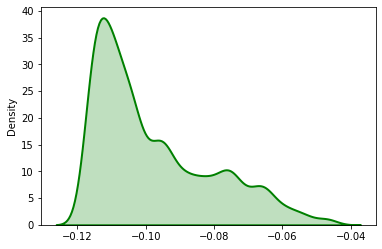

In [194]:
from scipy import stats

gdp_year_norm, gd_lambda = stats.boxcox(data.iloc[::, 7])

sns.distplot(gdp_year_norm, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "GDP per year Normal", color ="green")

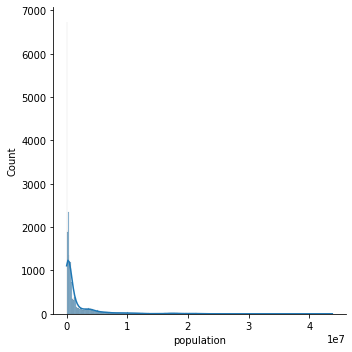

In [195]:
sns.displot(data["population"], kde=True)

In [196]:
data["population"].mean()

1844793.6173975556

In [197]:
data["population"].std()

3911779.4417563686

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


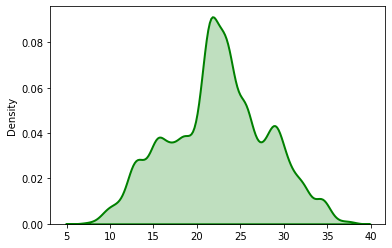

In [198]:
from scipy import stats

fitted_data_norm, fitted_lambda = stats.boxcox(data["population"])

sns.distplot(fitted_data_norm, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

In [199]:
data["population"] = fitted_data_norm

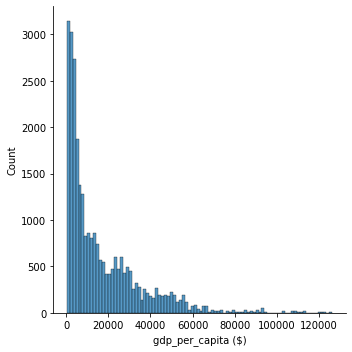

In [200]:
sns.displot(data["gdp_per_capita ($)"])

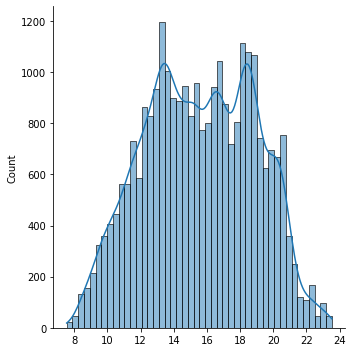

In [201]:
gdp_capita_data, gdp_capita_lambda = stats.boxcox(data["gdp_per_capita ($)"])

sns.displot(gdp_capita_data, kde = True)

In [202]:
data["gdp_per_capita ($)"] = gdp_capita_data

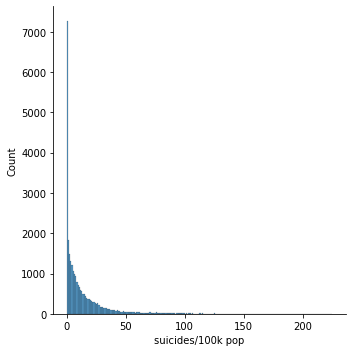

In [203]:
sns.displot(data["suicides/100k pop"])

In [204]:
data_suicide100k = data.loc[::, "suicides/100k pop"]


In [205]:
data_suicide100k[data_suicide100k < 0.0]

Series([], Name: suicides/100k pop, dtype: float64)

In [206]:
data_s = data_suicide100k[data_suicide100k < 0.0]
data_s

Series([], Name: suicides/100k pop, dtype: float64)

In [207]:
 data["suicides/100k pop"].shape

(27820,)

In [208]:
data["suicides/100k pop"] = abs(data["suicides/100k pop"])


In [209]:
data["suicides/100k pop"] = data["suicides/100k pop"].replace(0.0, (data["suicides/100k pop"].mean()))

In [210]:
data["suicides/100k pop"].unique()

array([ 6.71,  5.19,  4.83, ..., 47.86, 40.75, 26.61])

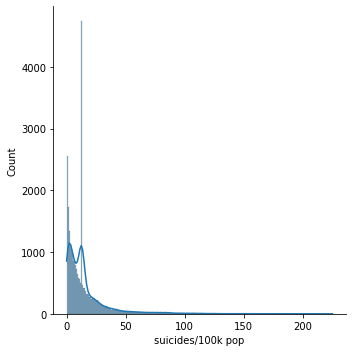

In [211]:
sns.displot(data["suicides/100k pop"], kde = True)

In [212]:
suicides_per_100k_norm, suicides_lambda = stats.boxcox(data["suicides/100k pop"])

In [213]:
suicides_lambda

0.2112725845397023

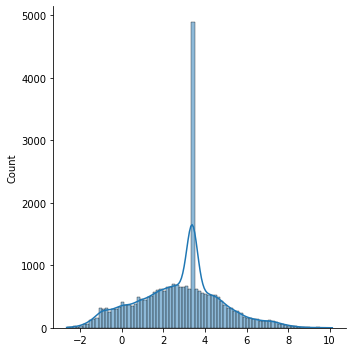

In [214]:
sns.displot(suicides_per_100k_norm,  kde = True)

In [215]:
data["suicides/100k pop"] = suicides_per_100k_norm

Bi-Variate Analysis

Text(0, 0.5, 'sucide number')

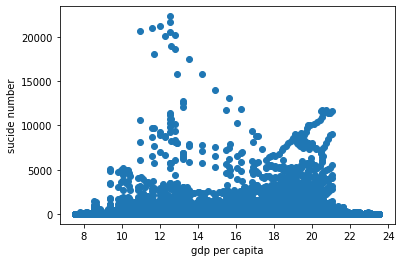

In [216]:

plt.scatter(x=data["gdp_per_capita ($)"], y=data["suicides_no"])
plt.xlabel("gdp per capita")
plt.ylabel("sucide number")

Text(0, 0.5, 'suicide_no')

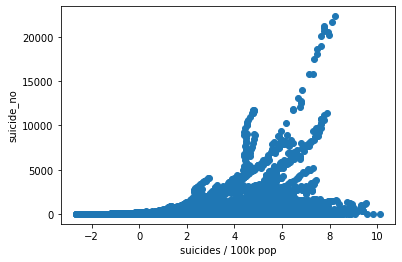

In [217]:
plt.scatter(x = data["suicides/100k pop"], y = data["suicides_no"])
plt.xlabel("suicides / 100k pop")
plt.ylabel("suicide_no")

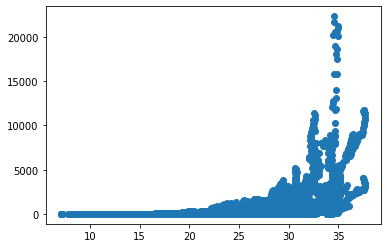

In [218]:
plt.scatter(x=data["population"] , y = data["suicides_no"])

In [219]:
data =data.drop(columns="HDI for year")

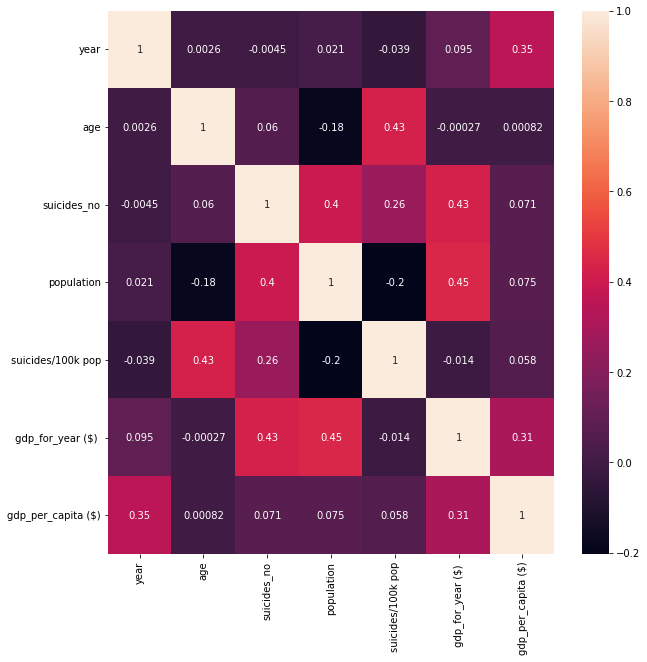

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [221]:
from sklearn.preprocessing import LabelEncoder

In [222]:
encoder = LabelEncoder()

data["country"] = encoder.fit_transform(data['country'])
data["generation"] = encoder.fit_transform(data["generation"])
data["sex"] = encoder.fit_transform(data["sex"])

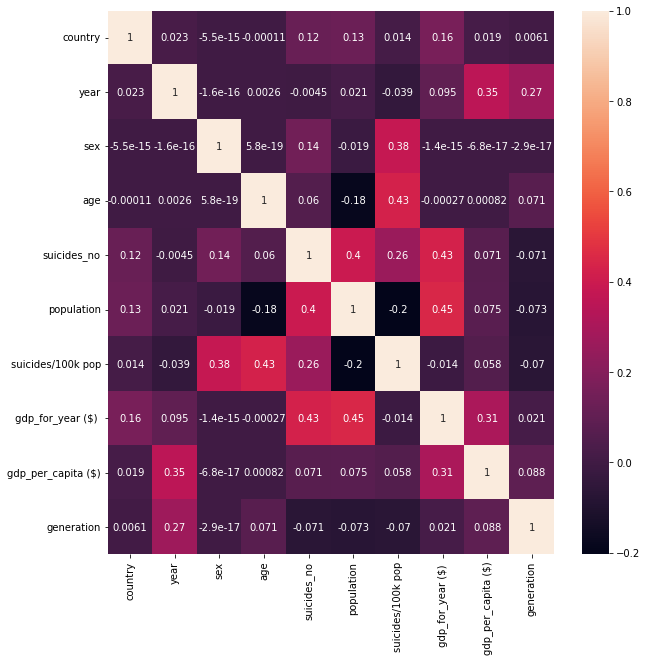

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [224]:
data.corr()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
country,1.000000e+00,2.276923e-02,-5.463705e-15,-1.119718e-04,0.118555,0.128631,0.014094,1.635832e-01,1.856834e-02,6.068990e-03
year,2.276923e-02,1.000000e+00,-1.577200e-16,2.587167e-03,-0.004546,0.021074,-0.039009,9.452857e-02,3.525204e-01,2.683006e-01
sex,-5.463705e-15,-1.577200e-16,1.000000e+00,5.807697e-19,0.144629,-0.019241,0.382623,-1.386038e-15,-6.798495e-17,-2.929210e-17
age,-1.119718e-04,2.587167e-03,5.807697e-19,1.000000e+00,0.059679,-0.183280,0.429131,-2.686691e-04,8.243148e-04,7.071081e-02
suicides_no,1.185555e-01,-4.545958e-03,1.446292e-01,5.967885e-02,1.000000,0.396197,0.261642,4.300959e-01,7.136193e-02,-7.062371e-02
population,1.286309e-01,2.107352e-02,-1.924062e-02,-1.832801e-01,0.396197,1.000000,-0.203299,4.466696e-01,7.454674e-02,-7.279820e-02
suicides/100k pop,1.409430e-02,-3.900919e-02,3.826227e-01,4.291311e-01,0.261642,-0.203299,1.000000,-1.394489e-02,5.842321e-02,-6.965761e-02
gdp_for_year ($),1.635832e-01,9.452857e-02,-1.386038e-15,-2.686691e-04,0.430096,0.446670,-0.013945,1.000000e+00,3.082010e-01,2.125070e-02
gdp_per_capita ($),1.856834e-02,3.525204e-01,-6.798495e-17,8.243148e-04,0.071362,0.074547,0.058423,3.082010e-01,1.000000e+00,8.828254e-02
generation,6.068990e-03,2.683006e-01,-2.929210e-17,7.071081e-02,-0.070624,-0.072798,-0.069658,2.125070e-02,8.828254e-02,1.000000e+00


In [225]:
data.columns 

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [226]:
# X = data.drop(columns=["suicides_no", "year", "age", "country", "generation", "gdp_per_capita ($)"])
# y = data["suicides_no"]

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [239]:
col = [["sex"], ["population"], ["suicides/100k pop"], [" gdp_for_year ($) "], ["sex", "population"], ["sex", "suicides/100k pop"], ["sex", " gdp_for_year ($) "], ["population", "suicides/100k pop"], ["population", " gdp_for_year ($) "], ["suicides/100k pop", " gdp_for_year ($) "],  ["sex", "population", "suicides/100k pop", " gdp_for_year ($) ", 'gdp_per_capita ($)']]

In [240]:
mse_list = []
mse_list_train = []
r2_list = []
for i in col:
  x = data[i]
  y = data["suicides_no"]
  x_train, x_test, y_train, y_test = train_test_split(x, y , random_state= 0, test_size=0.2)
  LR = LinearRegression(fit_intercept=True)
  LR.fit(x_train, y_train)
  
  y_pred_train = LR.predict(x_train)
  MSE_train = mean_squared_error(y_train, y_pred_train)
  y_pred = LR.predict(x_test)
  MSE = mean_squared_error(y_test, y_pred)
  r_LR = r2_score(y_test, y_pred)
  mse_list.append(MSE)
  mse_list_train.append(MSE_train)
  r2_list.append(r_LR)

In [242]:
print("Lowest MSE on test data:", min(mse_list))
print("R squared error: ", max(r2_list))
print("Lowest MSE on train data:", min(mse_list_train))

Lowest MSE on test data: 346333.171562486
R squared error:  0.41329946830940156
Lowest MSE on train data: 576784.2797826298


In [245]:
# residuals = y_train - y_pred_train
# fig = plt.subplots(figsize=(10,8))
# plt.scatter(y_pred_train, residuals, label="Linear Residuals")
# plt.axhline(y=0, color="black", linestyle="dashed")
# plt.xlabel("predicted values")
# plt.ylabel("residuals")
# plt.show()

In [234]:
from prettytable import PrettyTable
t = PrettyTable(["Predictors", "MSE", "R2 score"])

for j in range(len(mse_list)):
  t.add_row([col[j], mse_list_train[j]])

print(t)

+----------------------------------------------------------------------------------------+-------------------+
|                                       Predictors                                       |        MSE        |
+----------------------------------------------------------------------------------------+-------------------+
|                                        ['sex']                                         | 851968.0675499915 |
|                                     ['population']                                     | 736974.9995415382 |
|                                 ['suicides/100k pop']                                  | 810921.3265986309 |
|                                 [' gdp_for_year ($) ']                                 |  716979.117706542 |
|                                 ['sex', 'population']                                  |  717608.518780356 |
|                              ['sex', 'suicides/100k pop']                              | 809109.0574818435 |
|

In [244]:
from prettytable import PrettyTable
t = PrettyTable(["Predictors", "MSE", "R2 Score"])

for j in range(len(mse_list)):
  t.add_row([col[j], mse_list[j],  r2_list[j]])

print(t)

+----------------------------------------------------------------------------------------+--------------------+----------------------+
|                                       Predictors                                       |        MSE         |       R2 Score       |
+----------------------------------------------------------------------------------------+--------------------+----------------------+
|                                        ['sex']                                         | 575367.3880474534  | 0.025307477877650753 |
|                                     ['population']                                     | 482075.3252240625  | 0.18334750221046525  |
|                                 ['suicides/100k pop']                                  | 546322.0424734148  | 0.07451131132665378  |
|                                 [' gdp_for_year ($) ']                                 | 447896.7157817397  |  0.2412472645745164  |
|                                 ['sex', 'population']